In [1]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests


# you can specify the revision tag if you don't want the timm dependency
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model.eval().to("cuda")




DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): ResNetBackbone(
          (embedder): ResNetEmbeddings(
            (embedder): ResNetConvLayer(
              (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
              (normalization): DetrFrozenBatchNorm2d()
              (activation): ReLU()
            )
            (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          )
          (encoder): ResNetEncoder(
            (stages): ModuleList(
              (0): ResNetStage(
                (layers): Sequential(
                  (0): ResNetBottleNeckLayer(
                    (shortcut): ResNetShortCut(
                      (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                      (normalization): DetrFrozenBatchNorm2d()
                    )
                    (layer): Seq

In [2]:
url = "train_images/000000.jpg"
image = Image.open(url)


In [3]:
inputs = processor(images=image, return_tensors="pt").to("cuda")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )

Detected tv with confidence 0.933 at location [353.43, 185.96, 511.92, 450.6]


In [11]:
import torch
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForQuestionAnswering,BlipModel

processor = BlipProcessor.from_pretrained("ybelkada/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("ybelkada/blip-vqa-base", torch_dtype=torch.float16).to("cuda")



/home/aseems/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [12]:
model

BlipForQuestionAnswering(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-05, e

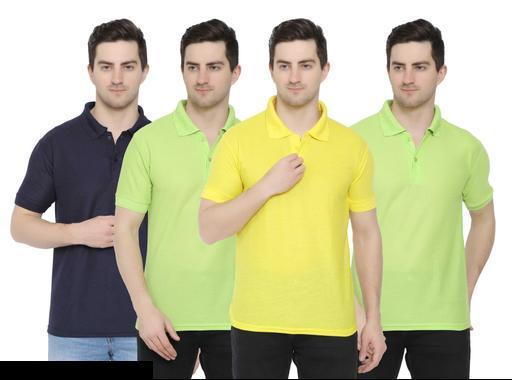

yellow


/home/aseems/.local/lib/python3.8/site-packages/transformers/generation/utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [13]:
url = "train_images/000001.jpg"
image = Image.open(url)
image.show()
question = "color:"
inputs = processor(image, question, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

In [14]:
model = BlipModel.from_pretrained("ybelkada/blip-vqa-base", torch_dtype=torch.float16).to("cuda")
model(**inputs)

`BlipModel` is going to be deprecated in future release, please use `BlipForConditionalGeneration`, `BlipForQuestionAnswering` or `BlipForImageTextRetrieval` depending on your usecase.
Some weights of BlipModel were not initialized from the model checkpoint at ybelkada/blip-vqa-base and are newly initialized: ['logit_scale', 'text_model.embeddings.LayerNorm.bias', 'text_model.embeddings.LayerNorm.weight', 'text_model.embeddings.position_embeddings.weight', 'text_model.embeddings.word_embeddings.weight', 'text_model.encoder.layer.0.attention.output.LayerNorm.bias', 'text_model.encoder.layer.0.attention.output.LayerNorm.weight', 'text_model.encoder.layer.0.attention.output.dense.bias', 'text_model.encoder.layer.0.attention.output.dense.weight', 'text_model.encoder.layer.0.attention.self.key.bias', 'text_model.encoder.layer.0.attention.self.key.weight', 'text_model.encoder.layer.0.attention.self.query.bias', 'text_model.encoder.layer.0.attention.self.query.weight', 'text_model.encoder.lay

BlipOutput(loss=None, logits_per_image=tensor([[0.0517]], device='cuda:0', dtype=torch.float16, grad_fn=<TBackward0>), logits_per_text=tensor([[0.0517]], device='cuda:0', dtype=torch.float16,
       grad_fn=<MulBackward0>), text_embeds=tensor([[ 1.0292e-02,  1.5991e-02,  5.2551e-02,  2.1408e-02,  7.4829e-02,
         -7.8125e-02, -4.0344e-02, -1.2840e-02, -1.5495e-02,  1.9638e-02,
          2.2247e-02, -4.2877e-02, -5.0232e-02, -6.9962e-03,  1.9760e-03,
          2.6672e-02,  4.6387e-02, -3.2410e-02, -3.3493e-03,  3.6865e-02,
          1.5404e-02, -5.4016e-02, -3.6087e-03,  5.7861e-02, -1.3260e-02,
         -4.0924e-02,  3.1036e-02,  2.6047e-02,  2.9480e-02, -7.3669e-02,
          2.0004e-02, -2.3148e-02,  2.7481e-02,  4.1626e-02,  8.1787e-02,
         -6.0608e-02, -5.4779e-03, -1.7838e-02,  4.4159e-02, -4.6814e-02,
          2.4551e-02,  8.7891e-02, -2.7115e-02, -1.0353e-04,  7.4158e-02,
          6.4880e-02,  4.5258e-02, -3.5496e-03,  3.5858e-02,  6.4373e-04,
          4.2229e-03,  3

In [15]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-classification", model="touchtech/fashion-images-gender-age-vit-large-patch16-224-in21k")
pipe(image)

config.json:   0%|          | 0.00/981 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.21G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/325 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'pack', 'score': 0.9924989342689514},
 {'label': 'model-male-adult', 'score': 0.9775200486183167},
 {'label': 'model-female-adult', 'score': 0.07433363050222397},
 {'label': 'model-male-child', 'score': 0.04171418026089668},
 {'label': 'model-female-child', 'score': 0.03721299767494202}]